# Boosting
#### Importation of resources:

In [8]:
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

seed=123

#### The wine dataset is loaded and the X and y variables within the dataset are stored in the same variables within this program. 
+ le = Label encoder used to encode the y variable
+ train_test_split = splits the dataset into 90% training data and 10% testing data
+ xgb_model = the XGBoost classifier
+ kf = the k fold cross validation method
+ xgbScore = the list of scores obtained within each fold by the XGBoost classifier

In [40]:
X,y = load_wine(return_X_y=True)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, objective="multi:softprob", random_state=seed, eval_metric="merror")
kf = KFold(n_splits=10, random_state=seed, shuffle=True)
xgbScore=[]

#### Training the XGBoost classifier

In [41]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model.fit(X_train, y_train)
    res = xgb_model.score(X_test, y_test)
    xgbScore.append(res)

#### The list of accuracies, the Mean and the Standard deviation of the trained XGBoost classifier are outputted below:

In [42]:
print("XGB:")
print(xgbScore)
standar = np.std(xgbScore)
print("\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(xgbScore)
print("Mean Value is = %0.4f" % (meanVal))

XGB:
[1.0, 1.0, 1.0, 1.0, 0.9444444444444444, 1.0, 0.8888888888888888, 1.0, 1.0, 0.8823529411764706]

Standard Deviation = 0.0460
Mean Value is = 0.9716


### The score on unseen data
+ score_unseen = The accuracy that is obtained of the XGBoost classifier classifying test data

In [45]:
score_unseen = xgb_model.score(X_test, y_test)
print("The score of the XGBoost classifier on unseen data:", np.around((100*score_unseen),decimals=2),"%")

0.8823529411764706


### Confusion Matrix of the XGBoost classifier

<AxesSubplot:title={'center':'XGBoost Confusion Matrix'}>

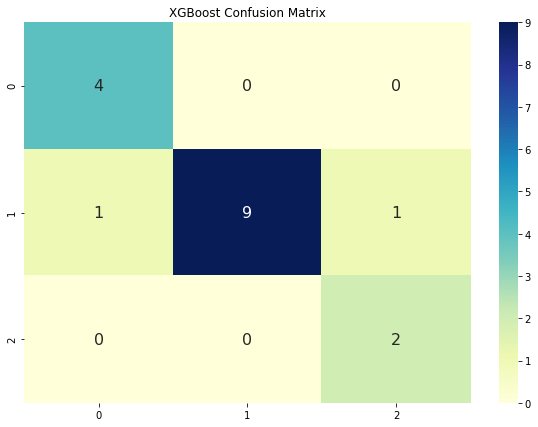

In [43]:
pred = xgb_model.predict(X_test)
expect = y_test
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('XGBoost Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})
